In [0]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

# 12. Многомерная оптимизация

Задача многомерной оптимизации заключается в поиске минимума (или максимума) функции $n$ переменных:

$$
\min f(x) \qquad x\in\mathbb{R}^n
$$

- Методы нулевого порядка (метод Хука–Дживса, метод Нелдера–Мида и др.) - в них вычисляется только значение функции в заданной точке

- Методы первого порядка (градиентный метод, метод наискорейшего спуска) - в них кроме значения функции в точке вычисляется значение частных производных

- Методы второго порядка (Ньютоновские и квази-Ньютоновские методы, например, BFGS: Broyden–Fletcher–Goldfarb–Shanno) - кроме значений функции и ее частных производных вычисляются (или аппроксимируются также значения вторых производных) 

## 1. Некоторые методы

### 1.1. Градиентные методы

Градиентом функции $f(x)$, зависящей от $n$ переменных $x=(x_1,x_2,\dots,x_n)$, называется вектор его частных производных:
$$
\nabla f(x) =
\left(
\begin{array}{c}
  \frac{\partial f(x)}{\partial x_1} \\
  \frac{\partial f(x)}{\partial x_2} \\
\vdots\\
  \frac{\partial f(x)}{\partial x_n} \\
\end{array}
\right).
$$
**Направление градиента совпадает с направлением *наискорейшего возрастания* функции в заданной точке.**

Вектор $-\nabla f(x)$ называется антиградиентом функции $f(x)$ в точке $x$.
Направление антиградиента совпадает с направлением *наискорейшего убывания* функции.

Градиентные методы минимизации основаны на идее движения от текущей точки в направлении антиградиента.

Находясь в некоторой точке $x_k$, двигаемся в направлении антиградиента $-\nabla f(x_k)$:
$$
x_{k+1} = x_k - t_k \nabla f(x_k)
$$
Здесь $k$ в $x_k$ - не номер координаты, а номер точки!

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Gradient_descent.png/375px-Gradient_descent.png'>

Некоторые способы выбора $t_k$:

- $t_k = {\rm const}$, например, $t_k = \frac{1}{L}$, если $\|\nabla f(x') - \nabla f(x'')\| \le L \|x'-x''\|$
- $t_k = {\rm argmin}_{\alpha \ge 0} \bigl(x_k - \alpha\nabla f(x_k) \bigr)$ – метод _наискорейшего спуска_

В этих случаях скорость сходимости линейная по значению градиента $\nabla f(x) \to 0$
(можно построить примеры, когда сходимости $x_k \to x^*$ нет).

Тем более, нельзя гарантировать сходимости к точке *глобального* минимума.

### 1.2. Метод Ньютона

Пусть $f(x)$ – дважды непрерывно дифференцируемая функция. Разложим $f(x)$ в ряд Тейлора в окрестности $x_k$.
Ограничимся линейной и квадратичной частью:

$$
f(x) \approx f(x_k) + (x-x_k)^{\rm T}\nabla f(x_k) + \frac{1}{2} (x-x_k)^{\rm T} \nabla^2 f(x_k) (x-x_k) \equiv g(x),
$$

где $\nabla f$ – градиент, а $\nabla^2 f$ – матрица Гессе (гессиан) функции $f$ (матрица вторых производных)
$$
\nabla^2 f = 
\left(
\begin{array}{cccc}
  \frac{\partial^2f(x)}{\partial x_1^2}& \frac{\partial^2 f(x)}{\partial x_1\partial x_2} &\dots& \frac{\partial^2 f(x)}{\partial x_1\partial x_n} \\
  \frac{\partial^2 f(x)}{\partial x_2\partial x_1} & \frac{\partial^2 f(x)}{\partial x_2^2} &\dots& \frac{\partial^2 f(x)}{\partial x_2\partial x_n} \\
\dots\\
  \frac{\partial^2 f(x)}{\partial x_n\partial x_1}&\frac{\partial^2 f(x)}{\partial x_n\partial x_2} &\dots& \frac{\partial^2 f(x)}{\partial x_n^2} \\
\end{array}
\right).
$$

$g(x)$ строго выпукла (в окрестности точки $x_k$) тогда и только тогда, когда $\nabla^2 f$ положительно определена (в точке $x_k$).

В этом случае глобальный минимум функции $g(x)$ достигается в точке, для которой 

$$
\nabla g(x) \equiv \nabla f(x_k) + \nabla^2 f(x_k) (x-x_k)  = 0
$$

Решение этой с.л.у. возьмем в качестве точки $x_{k+1}$:

$$
x_{k+1} = x_k - \bigl(\nabla^2 f(x_k)\bigr)^{-1} \nabla f(x_k)
$$

(При реальных вычислениях матрицу Гессе не обращают, а $x_{k+1}$ находят как решение с.л.у.)

Можно показать, что, стартуя из достаточно маленькой окрестности точки минимума $x^*$, метод сходится с квадратичной скоростью $x_k \to x^*$. 

#### Недостатки

- Заранее не известно, какая окрестность
- Необходимо вычислять матрицу 2-х производных и решать с ней с.л.у.

### 1.3. Квазиньютоновские методы

Матрицу Гессе аппроксимируем (без нахождения вторых производных) по остальной информации

Например, BFGS: Broyden–Fletcher–Goldfarb–Shanno

### 1.4. Метод Нелдера–Мида

Метод Нелдера-Мида (Nelder-Mead) называют еще методом деформируемого симплекса.
Это метод нулевого порядка, на каждой итерации вычислемый знаечния функции в вершинах некоторого симплекса (симплекс- это $n$-мерное обобщение треугольника и тетраэдра). На каждой итерации симплекс деформируется и меняет свое положение.

Метод Нелдера-Мида называют еще «другим» симплекс-методом.

(«Настоящий» симплекс-метод - это один из самых популярных и исторически первый метод линейного программирования. Это существенно другой метод, чем метод Нелдера-Мида)

### 1.5. Метод Хука–Дживса

Метод нулевого порядка (прямой метод)

In [0]:
def hooke_jeeves0(fun, x0, h=10.0, tol=1e-10):
    '''
    Метод Хука-Дживса
    '''
    x = x0
    n = len(x0)
    while True:
        y = x.copy() # x - текущая точка, y - следующая
        while True:
            # Поиск в окрестности
            f_min = fun(y)
            for j in range(n):
                y[j] += h
                f = fun(y)
                if (f < f_min):
                    f_min = f
                else:
                    y[j] -= 2*h
                    f = fun(y)
                    if (f < f_min):
                        f_min = f
                    else:
                        y[j] += h
            # Поиск по шаблону
            if fun(y) < fun(x):
                x, y = y, 2*y - x;
                continue
            if linalg.norm(h) < tol:
                return x
            h /= 2
            break

In [0]:
x0 = np.array([1.5, 1.56])
hooke_jeeves0(lambda x: 7*(x[0] - 1)**4 + (x[1] - 1)**2, x0)

array([1., 1.])

## 2. Эксперименты

### 2.1. Функция Розенброка

Функция Розенброка - известная тестовая функция

$$f(x, y) = (1-x)^2 + 100(y-x^2)^2$$

Легко видеть, что минимум этой функции находится в точке $(1,1)$ и равен $0$, однако для многих методов функция Розенброка является "крпеким орешком".

Функцию Розенброка, ее градиент и гессиан можно вычислить с помощью функций `rosen`, `rosen_der`, `rosen_hess` модуля `optimize`.

In [0]:
from scipy.optimize import rosen, rosen_der, rosen_hess

In [0]:
rosen([1, 1])

0.0

Линии уровня функции Розенброка имеют вытянутый бананообразный вид. Изобразим их.

In [0]:
x = np.linspace(-5, 5, 300)
y = np.linspace(-10, 30, 300)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((300,300))

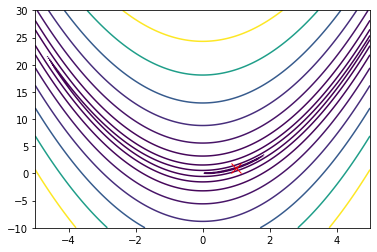

In [0]:
plt.contour(X, Y, Z, np.arange(10)**5)
plt.plot(1, 1, color='red', marker='x', markersize=10)
pass

$n$-мерное обобщение:
$$f(x) = \sum_{j=1}^{n-1} \left( (1-x_j)^2+ 100 (x_{j+1} - x_j^2 )^2 \right) \quad \forall  x\in\mathbb{R}^n$$

In [0]:
rosen([1, 1, 2])

100.0

### 2.2. Градиентный спуск

Реализуем градиентный метод в духе модуля `Optimize` (чтобы его можно было подавать как параметр функции `minimize`):

In [0]:
from scipy.optimize import minimize, OptimizeResult

In [0]:
def greedy_min(fun, x0, args=(), maxfev=None, alpha=0.0001,
        maxiter=100000, tol=1e-10, callback=None, **options):
    bestx = x0
    besty = fun(x0)
    funcalls = 1
    niter = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        step = alpha * rosen_der(bestx)
        bestx = bestx - step

        besty = fun(bestx)
        funcalls += 1

        if linalg.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return OptimizeResult(fun=besty, x=bestx, nit=niter,
                              nfev=funcalls, success=(niter > 1))

In [0]:
def reporter(p):
    global ps
    ps.append(p)

In [0]:
x0 = np.array([4.0, -4.0])

In [0]:
ps = [x0]
minimize(rosen, x0, method=greedy_min, callback=reporter)

     fun: 3.178542782474229e-05
    nfev: 100001
     nit: 100000
 success: True
       x: array([0.99436668, 0.98874248])

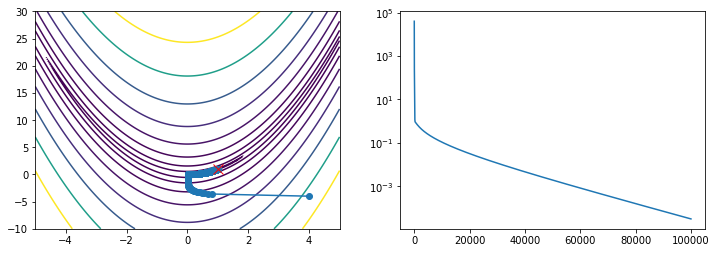

In [0]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5)
plt.plot(ps[:, 0], ps[:, 1], '-o')
plt.plot(1, 1, color='red', marker='x', markersize=10)
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

Метод завершил свою работу, так как выполнил максимально установленное число итераций ($100000$).
Можно попытаться улучшить результат, задав другое значение параметра `alpha`.
Из графика изменения значения функции (справа) видно, что сходимость линейная.

### 2.3. Метод Ньютона

In [0]:
ps = [x0]
minimize(rosen, x0, method='Newton-CG', jac=rosen_der, hess=rosen_hess, callback=reporter)

     fun: 8.363643401022829e-12
     jac: array([ 0.00093948, -0.00047169])
 message: 'Optimization terminated successfully.'
    nfev: 37
    nhev: 26
     nit: 26
    njev: 62
  status: 0
 success: True
       x: array([0.99999711, 0.99999421])

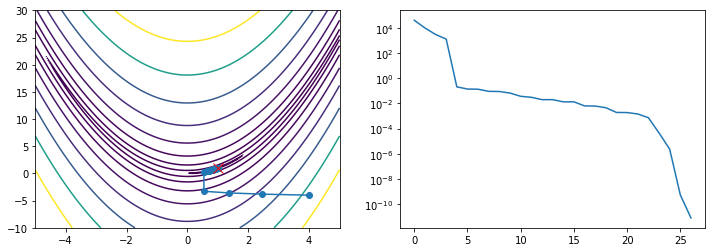

In [0]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5)
plt.plot(ps[:, 0], ps[:, 1], '-o')
plt.plot(1, 1, color='red', marker='x', markersize=10)
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

За 26 итераций получено хорошее приближение к точке минимума.

### 2.4. Квазиньютоновские методы

BFGS: Broyden–Fletcher–Goldfarb–Shanno

In [0]:
ps = [x0]
minimize(rosen, x0, method='BFGS', jac=rosen_der, callback=reporter)

      fun: 3.458355247302587e-14
 hess_inv: array([[0.52301235, 1.04971435],
       [1.04971435, 2.11239075]])
      jac: array([-6.09148140e-06,  3.14501643e-06])
  message: 'Optimization terminated successfully.'
     nfev: 74
      nit: 56
     njev: 74
   status: 0
  success: True
        x: array([1.0000001 , 1.00000021])

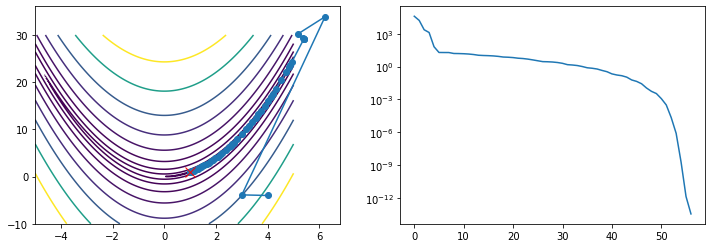

In [0]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5)
plt.plot(ps[:, 0], ps[:, 1], '-o')
plt.plot(1, 1, color='red', marker='x', markersize=10)
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

Методу потребовалось только 56 итераций, чтобы получить хорошее приближение к точке минимума.

### 2.5. Метод Нелдера-Мида


In [0]:
ps = [x0]
minimize(rosen, x0, method='nelder-mead', callback=reporter)

 final_simplex: (array([[0.99997564, 0.99995195],
       [1.0000253 , 1.00004626],
       [0.99997087, 0.99993688]]), array([6.36646195e-10, 2.52034239e-09, 3.21329025e-09]))
           fun: 6.366461950696284e-10
       message: 'Optimization terminated successfully.'
          nfev: 135
           nit: 69
        status: 0
       success: True
             x: array([0.99997564, 0.99995195])

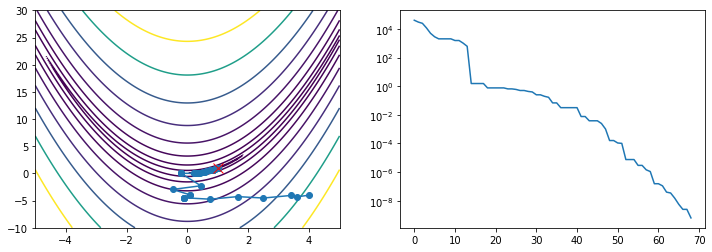

In [0]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5)
plt.plot(ps[:, 0], ps[:, 1], '-o')
plt.plot(1, 1, color='red', marker='x', markersize=10)
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

Для получения хорошего приближения к оптимуму потребовалось 69 итераций (135 вычислений значений оптимизируемой функции). Из графика справа видно, что скорость сходимости сверхлинейная.

### 2.6. Метод Хука-Дживса

Реализуем метод Хука-Дживса в духе модуля `optimize`:

In [0]:
def hooke_jeeves(fun, x0, h=1.0, tol=1e-10, args=(), callback=None, **options):
    '''
    Метод Хука-Дживса
    '''
    bestx = x0
    besty = fun(x0)
    funcalls = 1
    niter = 0
    improved = True
    stop = False
    
    x = x0
    fx = fun(x)
    n = len(x0)
    while True:
        y = x.copy() # x - текущая точка, y - следующая
        while True:
            niter += 1
            if callback is not None:
                callback(x)

            # Поиск в окрестности
            fy = fun(y); funcalls += 1
            for j in range(n):
                y[j] += h
                f = fun(y); funcalls += 1
                if (f < fy):
                    fy = f
                else:
                    y[j] -= 2*h
                    f = fun(y); funcalls += 1
                    if (f < fy):
                        fy = f
                    else:
                        y[j] += h
            # Поиск по шаблону
            if fy < fx:
                x, y = y, 2*y - x
                fx = fy
                continue
            if linalg.norm(h) < tol:
                return OptimizeResult(fun=fx, x=x, nit=niter,
                              nfev=funcalls, success=(niter > 1))
            h /= 2
            break     

In [0]:
ps = [x0]
minimize(rosen, x0, method=hooke_jeeves, callback=reporter)

     fun: 5.421010862427522e-20
    nfev: 1537
     nit: 339
 success: True
       x: array([1., 1.])

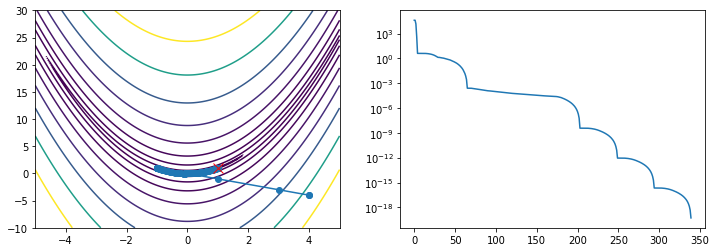

In [0]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5)
plt.plot(ps[:, 0], ps[:, 1], '-o')
plt.plot(1, 1, color='red', marker='x', markersize=10)
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

Решение получено за 339 итерацийй (1537 вычислений значений оптимизируемой функции). Из графика справа видно, что скорость сходимости сверхлинейная. Можно посмотреть, как быстро сходится метод, если поменять исходную точку и другие параметры метода.